In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqldf
from dataprep.clean import validate_country

In [2]:
earthquake_df = pd.read_csv('./earthquake_data.csv')

In [3]:
earthquake_df.head()

,year,month,hour,latitude,longitude,focal_depth_(km),magnitude,country,magnitude_scale
0,1950,1,17,27.255,53.029,15.0,5.7,IRAN,slight_damage
1,1950,1,0,-53.500,-71.500,33.0,7.0,CHILE,serious damage
2,1950,2,19,21.700,100.100,0.0,7.0,CHINA,serious damage
3,1950,2,9,40.000,40.000,0.0,0.0,TURKEY,limited damage
4,1950,2,10,46.000,144.000,340.0,7.9,RUSSIA,serious damage


In [4]:
earthquake_df.shape

(2756, 9)


## Insights and Visualization

## 1) What is the trend of earthquake by Year
## 2) Which is the most frequent occuring earthquake by magnitude_scale
## 3) Which country has the most occurance of earthquakes
## 4) What is the largest earthquake by magnitude
## 5) Is there a relationship between focal_depth and magnitude
## 6) What is the occurance of earthquake in 2022 by month
## 7) Country with most earthquake in 2022
## 8) What is the most frequent occuring earthquake in 2022 by magnitude scale

In [127]:
earthquake_df = earthquake_df[validate_country(earthquake_df["country"])]
earthquake_df.country.unique()

array(['IRAN', 'CHILE', 'CHINA', 'TURKEY', 'RUSSIA', 'BRAZIL', 'PANAMA',
       'PERU', 'INDONESIA', 'COLOMBIA', 'VENEZUELA', 'ECUADOR',
       'GUATEMALA', 'SOLOMON ISLANDS', 'MEXICO', 'PAPUA NEW GUINEA',
       'PHILIPPINES', 'EL SALVADOR', 'NICARAGUA', 'ITALY', 'TAIWAN',
       'JAPAN', 'COSTA RICA', 'HAITI', 'DOMINICAN REPUBLIC', 'GREECE',
       'CYPRUS', 'AUSTRALIA', 'SPAIN', 'AFGHANISTAN', 'ALGERIA',
       'PAKISTAN', 'INDIA', 'EGYPT', 'HUNGARY', 'NEW ZEALAND', 'LEBANON',
       'TUNISIA', 'BOLIVIA', 'MONGOLIA', 'FRANCE', 'ALBANIA', 'MOROCCO',
       'ETHIOPIA', 'LIBYA', 'TANZANIA', 'UGANDA', 'UZBEKISTAN', 'KENYA',
       'ARMENIA', 'SOUTH AFRICA', 'GUADELOUPE', 'KAZAKHSTAN', 'CANADA',
       'NEW CALEDONIA', 'ANTARCTICA', 'ARGENTINA', 'GABON', 'GUAM',
       'ICELAND', 'MALAYSIA', 'TAJIKISTAN', 'ROMANIA', 'GERMANY',
       'SOUTH KOREA', 'MONTENEGRO', 'SAMOA', 'HONDURAS', 'YEMEN',
       'TURKMENISTAN', 'THAILAND', 'VIETNAM', 'BELGIUM', 'GUINEA',
       'UNITED KINGDOM', 'GEOR

## Trend of earthquake by Year

In [98]:
earthquake_by_year = earthquake_df.year.value_counts()

earthquake_by_year.sort_values(ascending=False)

2004    78
2008    77
2003    72
2018    69
2007    67
        ..
1953    21
1964    20
1996    19
1952    19
1951    17
Name: year, Length: 73, dtype: int64

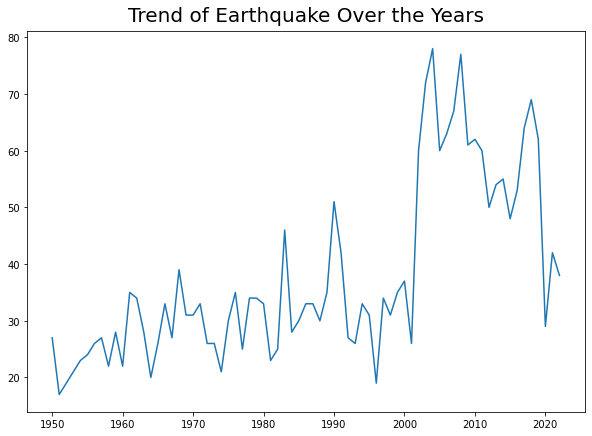

In [99]:
plt.figure(figsize=(10,7))
sns.lineplot(x=earthquake_by_year.index, y=earthquake_by_year.values, data=earthquake_by_year, markers=True)
plt.title('Trend of Earthquake Over the Years', fontsize=20, pad=10)
plt.show()

In [116]:
len(earthquake_df[earthquake_df.year == 2020])

29

## Which is the most frequent occuring earthquake by magnitude_scale

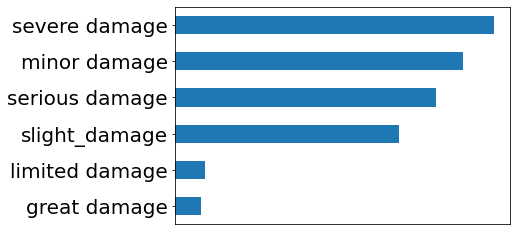

In [101]:
earthquake_df.magnitude_scale.value_counts().plot(kind='barh', fontsize=20).invert_yaxis()
plt.xticks([])
plt.show()

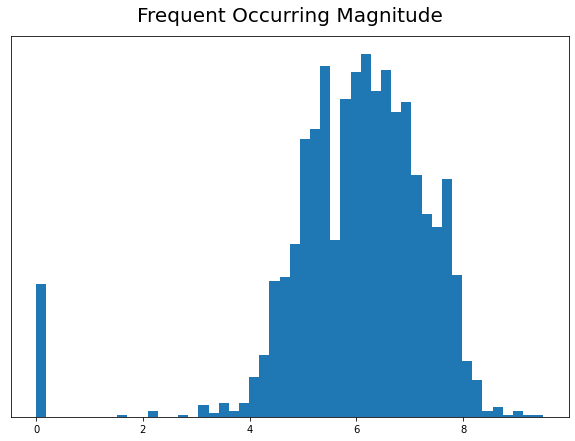

In [102]:
plt.figure(figsize=(10,7))

plt.hist(earthquake_df.magnitude, bins=50)

plt.title('Frequent Occurring Magnitude', fontsize=20, pad=15)
plt.yticks([])
plt.show()

## Which country has the most occurance of earthquakes

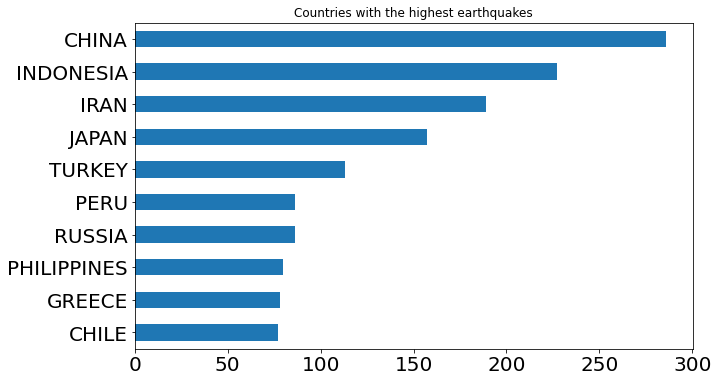

In [128]:
plt.figure(figsize=(10,6))

earthquake_df['country'].value_counts()[:10].sort_values().plot(kind='barh', fontsize=20)
plt.title('Countries with the highest earthquakes')

plt.show()

## Largest earthquake by magnitude

In [149]:
earthquake_df.nlargest(columns='magnitude', n=10)[['year','focal_depth_(km)', 'magnitude', 'country', 'magnitude_scale']].sort_values(by='country')

,year,focal_depth_(km),magnitude,country,magnitude_scale
245,1960,33.0,9.5,CHILE,great damage
2083,2010,23.0,8.8,CHILE,great damage
1741,2004,30.0,9.1,INDONESIA,great damage
1763,2005,30.0,8.6,INDONESIA,great damage
2205,2012,20.0,8.6,INDONESIA,great damage
1910,2007,34.0,8.4,INDONESIA,great damage
2143,2011,30.0,9.1,JAPAN,great damage
1517,2001,33.0,8.4,PERU,great damage
60,1952,22.0,9.0,RUSSIA,great damage
347,1963,13.0,8.5,RUSSIA,great damage


## Relationship between focal_depth and magnitude

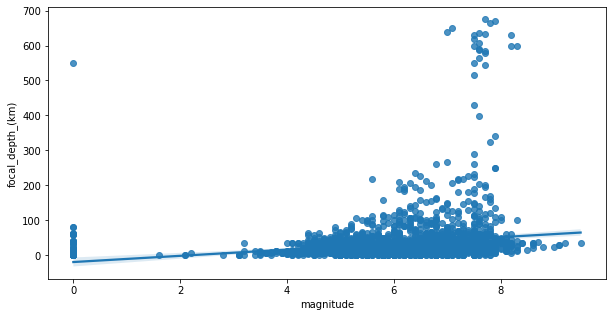

In [123]:
plt.figure(figsize=(10,5))
sns.regplot(x='magnitude', y='focal_depth_(km)', data=earthquake_df)
plt.show()

In [60]:
import calendar

In [61]:
earthquake_df['month_name'] = earthquake_df['month'].apply(lambda x: calendar.month_name[x])

## Occurance of earthquake in 2022 by month

In [62]:
earthquake_2022 = earthquake_df[earthquake_df['year'] == 2022]

earthquake_2022.head()

,year,month,hour,latitude,longitude,focal_depth_(km),magnitude,country,magnitude_scale,month_name
2718,2022,1,17,37.815,101.278,13.0,6.6,CHINA,severe damage,January
2719,2022,1,9,-6.929,105.251,37.0,6.6,INDONESIA,severe damage,January
2720,2022,1,11,34.946,63.580,18.0,5.3,AFGHANISTAN,minor damage,January
2721,2022,1,13,18.458,-73.337,10.0,5.3,HAITI,minor damage,January
2722,2022,1,2,-29.531,-176.749,10.0,6.5,NEW ZEALAND,severe damage,January


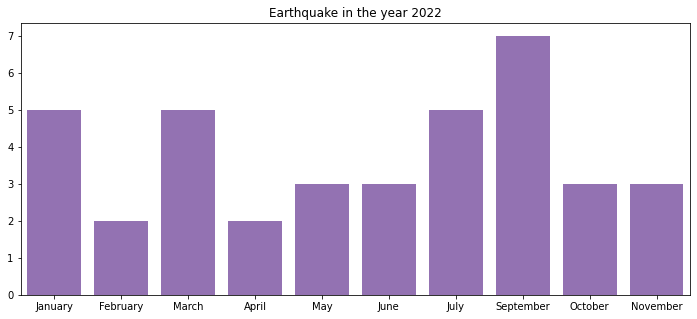

In [63]:
color = sns.color_palette()[4]

plt.figure(figsize=(12,5))
sns.countplot(data=earthquake_2022, x='month_name',color=color)
plt.title('Earthquake in the year 2022')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [64]:
top_affected_countries = earthquake_2022[earthquake_2022.country.isin(['CHINA','INDONESIA','PERU','MEXICO','AFGHANISTAN'])]

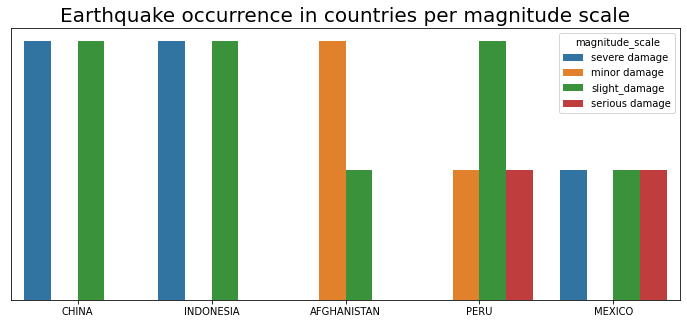

In [67]:
plt.figure(figsize=(12,5))
sns.countplot(x='country', hue='magnitude_scale', data=top_affected_countries)
plt.title('Earthquake occurrence in countries per magnitude scale', fontsize=20)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.show()

## Country with highest earthquake in 2022

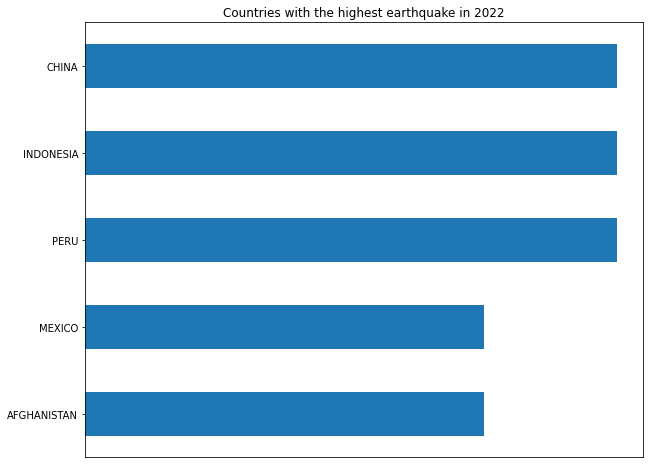

In [8]:
plt.figure(figsize=(10,8))
earthquake_2022.country.value_counts()[:5].plot(kind='barh').invert_yaxis()

plt.xticks([])
plt.title('Countries with the highest earthquake in 2022')
plt.show()


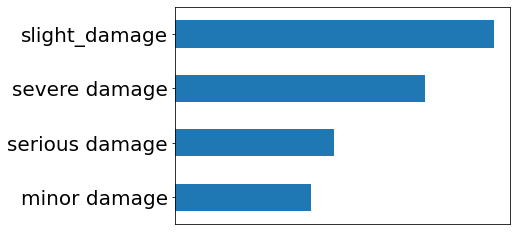

In [9]:
earthquake_2022.magnitude_scale.value_counts().plot(kind='barh', fontsize=20).invert_yaxis()
plt.xticks([])
plt.show()